<a href="https://colab.research.google.com/github/thedeenun/CS345_Final-project/blob/main/CS345_Income_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Income Classification

##ลักษณะของกลุ่มข้อมูล (Data Description)
หัวข้อ Income Dataset จาก https://www.kaggle.com/mastmustu/income ซึ่งเป็นข้อมูลที่มีเนื้อหาเกี่ยวกับข้อมูลสภาพอากาศของกรุงเทพมหานครในช่วงเวลาตั้ง

โดย Data set ที่เลือกมา มีลักษณะดังนี้

**Train Set**
* Data set characteristic : Multivariate
* Attribute characteristic : Integer, Object
* จำนวน missing values : 5767
* จำนวน Instance : 43958 
* จำนวน Attribute: 14 ดังนี้
  1. age : 
  2. workclass : 
  3. fnlwgt : 
  4. education : 
  5. educational-num : 
  6. occupation : 
  7. relationship	:
  8. race :
  9. gender :
  10. capital-gain :
  11. capital-loss :
  12. hours-per-week :
  13. native-country	:
  14. income_>50k :


**Test Set**
* Data set characteristic : Multivariate
* Attribute characteristic : Integer, Object
* จำนวน missing values : 0
* จำนวน Instance : 899 
* จำนวน Attribute: 13 ดังนี้
  1. age : 
  2. workclass : 
  3. fnlwgt : 
  4. education : 
  5. educational-num : 
  6. occupation : 
  7. relationship	:
  8. race :
  9. gender :
  10. capital-gain :
  11. capital-loss :
  12. hours-per-week :
  13. native-country	:

# ขั้นตอนการเตรียมชุดข้อมูล

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [3]:
df_train.isnull().sum()

age                   0
workclass          2498
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2506
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      763
income_>50K           0
dtype: int64

In [4]:
df_train.dropna(axis=0, inplace=True)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40727 non-null  int64 
 1   workclass        40727 non-null  object
 2   fnlwgt           40727 non-null  int64 
 3   education        40727 non-null  object
 4   educational-num  40727 non-null  int64 
 5   marital-status   40727 non-null  object
 6   occupation       40727 non-null  object
 7   relationship     40727 non-null  object
 8   race             40727 non-null  object
 9   gender           40727 non-null  object
 10  capital-gain     40727 non-null  int64 
 11  capital-loss     40727 non-null  int64 
 12  hours-per-week   40727 non-null  int64 
 13  native-country   40727 non-null  object
 14  income_>50K      40727 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 5.0+ MB


In [6]:
df_test.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
dtype: int64

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              899 non-null    int64 
 1   workclass        899 non-null    object
 2   fnlwgt           899 non-null    int64 
 3   education        899 non-null    object
 4   educational-num  899 non-null    int64 
 5   marital-status   899 non-null    object
 6   occupation       899 non-null    object
 7   relationship     899 non-null    object
 8   race             899 non-null    object
 9   gender           899 non-null    object
 10  capital-gain     899 non-null    int64 
 11  capital-loss     899 non-null    int64 
 12  hours-per-week   899 non-null    int64 
 13  native-country   899 non-null    object
dtypes: int64(6), object(8)
memory usage: 98.5+ KB


In [98]:
df_train['income_>50K'].value_counts()

0    30635
1    10092
Name: income_>50K, dtype: int64

#ขั้นตอนการแปลงข้อมูลประเภท Nominal หรือ Ordinal ให้เป็น Numerical (One hot encoding)

In [8]:
list_columns_onehotendcode = []
list_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']
for i in  list_columns:
  for j in set(df_train[i]):
    temp = i+"_"+j
    if j not in list_columns_onehotendcode:
      list_columns_onehotendcode.append(temp)
  for j in set(df_test[i]):
    temp = i+"_"+j
    if j not in list_columns_onehotendcode:
      list_columns_onehotendcode.append(temp)    

print(list_columns_onehotendcode)

['workclass_Federal-gov', 'workclass_Without-pay', 'workclass_Local-gov', 'workclass_Self-emp-not-inc', 'workclass_Private', 'workclass_State-gov', 'workclass_Self-emp-inc', 'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Self-emp-not-inc', 'workclass_Private', 'workclass_State-gov', 'workclass_Self-emp-inc', 'education_Masters', 'education_Preschool', 'education_Doctorate', 'education_9th', 'education_Prof-school', 'education_7th-8th', 'education_Assoc-voc', 'education_Some-college', 'education_11th', 'education_5th-6th', 'education_HS-grad', 'education_10th', 'education_Bachelors', 'education_1st-4th', 'education_Assoc-acdm', 'education_12th', 'education_Masters', 'education_Preschool', 'education_Doctorate', 'education_Prof-school', 'education_9th', 'education_7th-8th', 'education_Assoc-voc', 'education_Some-college', 'education_11th', 'education_5th-6th', 'education_HS-grad', 'education_10th', 'education_Bachelors', 'education_1st-4th', 'education_Assoc-acdm', 'education

In [9]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [10]:
df_train2[list_columns_onehotendcode] = 0
df_test2[list_columns_onehotendcode] = 0

In [11]:
for i in list_columns:
  for j in list_columns_onehotendcode:
    df_train2.loc[df_train2[i].str.contains(j,case=False),j]=1
    df_test2.loc[df_test2[i].str.contains(j,case=False),j]=1

In [12]:
df_train2 = df_train2.drop(columns=list_columns)
df_test2 = df_test2.drop(columns=list_columns)

In [13]:
print(df_train2.info())
print(df_test2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Columns: 105 entries, age to native-country_Vietnam
dtypes: int64(105)
memory usage: 32.9 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Columns: 104 entries, age to native-country_Vietnam
dtypes: int64(104)
memory usage: 730.6 KB
None


In [14]:
df_train2.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Federal-gov,workclass_Without-pay,workclass_Local-gov,workclass_Self-emp-not-inc,workclass_Private,workclass_State-gov,workclass_Self-emp-inc,education_Masters,education_Preschool,education_Doctorate,education_9th,education_Prof-school,education_7th-8th,education_Assoc-voc,education_Some-college,education_11th,education_5th-6th,education_HS-grad,education_10th,education_Bachelors,education_1st-4th,education_Assoc-acdm,education_12th,marital-status_Never-married,marital-status_Separated,marital-status_Married-civ-spouse,marital-status_Widowed,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-spouse-absent,occupation_Protective-serv,occupation_Adm-clerical,occupation_Prof-specialty,...,native-country_Peru,native-country_Honduras,native-country_Hungary,native-country_South,native-country_Outlying-US(Guam-USVI-etc),native-country_Poland,native-country_El-Salvador,native-country_Italy,native-country_India,native-country_Dominican-Republic,native-country_United-States,native-country_Jamaica,native-country_Cambodia,native-country_Guatemala,native-country_France,native-country_Mexico,native-country_Iran,native-country_Philippines,native-country_Portugal,native-country_Puerto-Rico,native-country_Cuba,native-country_Columbia,native-country_Haiti,native-country_Ireland,native-country_Canada,native-country_England,native-country_Laos,native-country_Yugoslavia,native-country_Hong,native-country_Germany,native-country_Japan,native-country_Greece,native-country_Holand-Netherlands,native-country_Ecuador,native-country_Trinadad&Tobago,native-country_Nicaragua,native-country_Thailand,native-country_Scotland,native-country_Taiwan,native-country_Vietnam
0,67,366425,16,99999,0,60,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,17,244602,8,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,31,174201,13,0,0,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,58,110199,4,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,25,149248,10,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
df_test2.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Without-pay,workclass_Local-gov,workclass_Self-emp-not-inc,workclass_Private,workclass_State-gov,workclass_Self-emp-inc,education_Masters,education_Preschool,education_Doctorate,education_9th,education_Prof-school,education_7th-8th,education_Assoc-voc,education_Some-college,education_11th,education_5th-6th,education_HS-grad,education_10th,education_Bachelors,education_1st-4th,education_Assoc-acdm,education_12th,marital-status_Never-married,marital-status_Separated,marital-status_Married-civ-spouse,marital-status_Widowed,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-spouse-absent,occupation_Protective-serv,occupation_Adm-clerical,occupation_Prof-specialty,occupation_Priv-house-serv,...,native-country_Peru,native-country_Honduras,native-country_Hungary,native-country_South,native-country_Outlying-US(Guam-USVI-etc),native-country_Poland,native-country_El-Salvador,native-country_Italy,native-country_India,native-country_Dominican-Republic,native-country_United-States,native-country_Jamaica,native-country_Cambodia,native-country_Guatemala,native-country_France,native-country_Mexico,native-country_Iran,native-country_Philippines,native-country_Portugal,native-country_Puerto-Rico,native-country_Cuba,native-country_Columbia,native-country_Haiti,native-country_Ireland,native-country_Canada,native-country_England,native-country_Laos,native-country_Yugoslavia,native-country_Hong,native-country_Germany,native-country_Japan,native-country_Greece,native-country_Holand-Netherlands,native-country_Ecuador,native-country_Trinadad&Tobago,native-country_Nicaragua,native-country_Thailand,native-country_Scotland,native-country_Taiwan,native-country_Vietnam
0,39,327120,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,32,123253,12,0,0,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,47,232628,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,19,374262,8,0,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,46,311231,9,0,0,40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# ดาวน์โหลด Data set หลังการทำ Pre-process 

In [103]:
df_train2.to_csv('df_train2.csv')
df_test2.to_csv('df_test2.csv')
testset_with_class.to_csv('testset_with_class.csv')

# ขั้นตอนการสร้างและเปรียบเทียบโมเดล

In [37]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [18]:
X = df_train2.drop(columns='income_>50K').values
y = df_train2.loc[:,['income_>50K']].values

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=1)

In [20]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(kernel='linear')))
models.append(('Neural Network', MLPClassifier(solver='lbfgs', hidden_layer_sizes=54)))

KNN: 0.797621
SVM: 0.797976
Neural Network: 0.817783


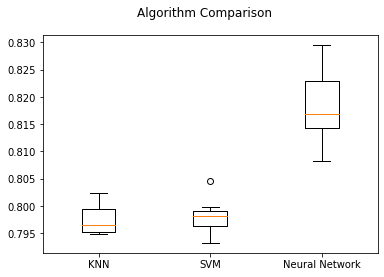

In [63]:
results = []
names = []
for name, model in models:
	cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f' % (name, cv_results.mean()))

fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [64]:
print("Accuracy after prediction")
for name, model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  result = metrics.accuracy_score(y_test, y_pred)
  print('%s: %f' % (name, result))

Accuracy after prediction
KNN: 0.789590
SVM: 0.791800
Neural Network: 0.811687


# ขั้นตอนการเลือกโมเดลในการจำแนก

In [82]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=54, max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [83]:
print("Confustion Matrix: \n",confusion_matrix(y_test,y_pred))
print()
print("Report: \n",classification_report(y_test,y_pred))
print()
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Confustion Matrix: 
 [[2902  153]
 [ 593  425]]

Report: 
               precision    recall  f1-score   support

           0       0.83      0.95      0.89      3055
           1       0.74      0.42      0.53      1018

    accuracy                           0.82      4073
   macro avg       0.78      0.68      0.71      4073
weighted avg       0.81      0.82      0.80      4073


Accuracy:  0.8168426221458385


#ขั้นตอนการทดสอบกับชุดข้อมูลทดสอบ(test.csv)

In [99]:
testset = df_test2.values
y_pred_testset = model.predict(testset)
testset_with_class = df_test2.copy()
testset_with_class['income_>50K'] = y_pred_testset

In [100]:
testset_with_class = pd.DataFrame(testset_with_class)

In [101]:
testset_with_class['income_>50K'].value_counts()

0    839
1     60
Name: income_>50K, dtype: int64

# รายชื่อผู้จัดทำ

นายอาดีนัน อับดุลลี 6209650719